# Visualize the whole slide with the final annotations

In [1]:
import spatialdata
import spatialdata_plot
import gc

In [2]:
# CHOOSE THE SLIDE ID
slide_id = "kidney_s0"

In [3]:
# Open sdata
sdata = spatialdata.read_zarr(f"/Volumes/DD1_FGS/MICS/data_HE2CellType/CT_DS/sdata_final/sdata_{slide_id}.zarr", selection=('tables', 'shapes'))

In [4]:
# Clear memory
for table_name in ['features_cellvit', 'features_phikonv2', 'features_vit_google', 'table_combined', 'table_nuclei', 'table_scvi']:
    del sdata.tables[table_name]
    gc.collect()
print(sdata)

SpatialData object, with associated Zarr store: /Volumes/DD1_FGS/MICS/data_HE2CellType/CT_DS/sdata_final/sdata_kidney_s0.zarr
├── Shapes
│     ├── 'cell_boundaries': GeoDataFrame shape: (97560, 1) (2D shapes)
│     ├── 'he_patches': GeoDataFrame shape: (10788, 7) (2D shapes)
│     └── 'nucleus_boundaries': GeoDataFrame shape: (97560, 1) (2D shapes)
└── Tables
      └── 'table_cells': AnnData (97560, 377)
with coordinate systems:
    ▸ '_13810502528_intrinsic', with elements:
        he_patches (Shapes)
    ▸ 'global', with elements:
        cell_boundaries (Shapes), he_patches (Shapes), nucleus_boundaries (Shapes)
with the following elements in the Zarr store but not in the SpatialData object:
    ▸ st (Points)
    ▸ table_combined (Tables)
    ▸ table_nuclei (Tables)
    ▸ features_phikonv2 (Tables)
    ▸ table_scvi (Tables)
    ▸ features_cellvit (Tables)
    ▸ he (Images)
    ▸ features_vit_google (Tables)
    ▸ morpho (Images)


In [5]:
# Add 'final_label' that is in 'table_cells' into shapes['cell_boundaries'] using 'cell_id'
id2label = dict(zip(sdata.tables['table_cells'].obs['cell_id'], sdata.tables['table_cells'].obs['final_label']))
sdata.shapes['cell_boundaries']['final_label'] = sdata.shapes['cell_boundaries'].index.map(id2label)
sdata.shapes['cell_boundaries']

,geometry,final_label
cell_id,,
aaaaaaaa-1,"POLYGON ((2695.138 851.7, 2692.588 866.575, 26...",Epithelial
aaaaaaab-1,"POLYGON ((2703.638 845.963, 2699.812 848.088, ...",Epithelial
aaaaaaac-1,"POLYGON ((2709.8 838.738, 2707.038 841.5, 2704...",Myeloid
aaaaaaad-1,"POLYGON ((2715.75 860.413, 2713.413 861.475, 2...",Epithelial
aaaaaaae-1,"POLYGON ((2717.238 847.663, 2712.562 848.088, ...",Blood_vessel
...,...,...
aaabhnbd-1,"POLYGON ((1827.288 2580.6, 1813.9 2587.4, 1813...",Myeloid
aaabhnbe-1,"POLYGON ((1814.113 2588.675, 1816.45 2603.125,...",Myeloid
aaabhnbf-1,"POLYGON ((1829.413 2564.663, 1828.988 2567.637...",Epithelial


In [6]:
# Clear memory
del sdata.tables['table_cells']
del sdata.shapes['nucleus_boundaries']
del sdata.shapes['he_patches']
gc.collect()
sdata

SpatialData object, with associated Zarr store: /Volumes/DD1_FGS/MICS/data_HE2CellType/CT_DS/sdata_final/sdata_kidney_s0.zarr
└── Shapes
      └── 'cell_boundaries': GeoDataFrame shape: (97560, 2) (2D shapes)
with coordinate systems:
    ▸ 'global', with elements:
        cell_boundaries (Shapes)
with the following elements in the Zarr store but not in the SpatialData object:
    ▸ st (Points)
    ▸ table_combined (Tables)
    ▸ table_nuclei (Tables)
    ▸ nucleus_boundaries (Shapes)
    ▸ features_phikonv2 (Tables)
    ▸ table_cells (Tables)
    ▸ table_scvi (Tables)
    ▸ he_patches (Shapes)
    ▸ he (Images)
    ▸ features_cellvit (Tables)
    ▸ features_vit_google (Tables)
    ▸ morpho (Images)

In [7]:
# Map each final_label to a number
sdata.shapes['cell_boundaries']['final_label_num'] = sdata.shapes['cell_boundaries']['final_label'].astype('category').cat.codes
sdata.shapes['cell_boundaries'].head()

,geometry,final_label,final_label_num
cell_id,,,
aaaaaaaa-1,"POLYGON ((2695.138 851.7, 2692.588 866.575, 26...",Epithelial,2
aaaaaaab-1,"POLYGON ((2703.638 845.963, 2699.812 848.088, ...",Epithelial,2
aaaaaaac-1,"POLYGON ((2709.8 838.738, 2707.038 841.5, 2704...",Myeloid,5
aaaaaaad-1,"POLYGON ((2715.75 860.413, 2713.413 861.475, 2...",Epithelial,2
aaaaaaae-1,"POLYGON ((2717.238 847.663, 2712.562 848.088, ...",Blood_vessel,1


In [8]:
# Print legend (which number corresponds to which label)
print("Label: Number")
for label, num in zip(sdata.shapes['cell_boundaries']['final_label'].unique(), sdata.shapes['cell_boundaries']['final_label_num'].unique()):
    print(f"{label}: {num}")

Label: Number
Epithelial: 2
Myeloid: 5
Blood_vessel: 1
T_NK: 6
Fibroblast_Myofibroblast: 3
B_Plasma: 0
Less10: 4


In [9]:
# Put the final labels num as categories
sdata.shapes['cell_boundaries']['final_label_num'] = sdata.shapes['cell_boundaries']['final_label_num'].astype('category')

INFO     Using 'datashader' as plotting backend.                                                                   


/Users/felicie-giraud-sauveur/miniforge3/envs/cluster/lib/python3.10/site-packages/spatialdata_plot/pl/utils.py:786: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_mapping)


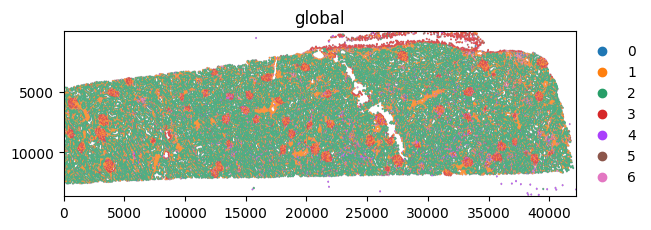

In [10]:
sdata.pl.render_shapes(
    "cell_boundaries", color="final_label_num"
).pl.show("global")